# 1. Tweet classification: Trump vs. Trudeau

So you think you can classify text? How about tweets? In this notebook, I'll take a dive into the world of social media text classification by investigating how to properly classify tweets from two prominent North American politicians: Donald Trump and Justin Trudeau.

Tweets pose specific problems to NLP, including the fact they are shorter texts. There are also plenty of platform-specific conventions to give you hassles: mentions, #hashtags, emoji, links and short-hand phrases (ikr?). Can we overcome those challenges and build a useful classifier for these two tweeters? Yes! Let's get started.
To begin, we will import all the tools we need from scikit-learn. We will need to properly vectorize our data (CountVectorizer and TfidfVectorizer). And we will also want to import some models, including MultinomialNB from the naive_bayes module, LinearSVC from the svm module and PassiveAggressiveClassifier from the linear_model module. Finally, we'll need sklearn.metrics and train_test_split and GridSearchCV from the model_selection module to evaluate and optimize our model.

In [1]:
# Set seed for reproducibility
import random; random.seed(53)

# Import all we need from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

## 2. Transforming our collected data
To begin, let's start with a corpus of tweets which were collected in November 2017. They are available in CSV format. We'll use a Pandas DataFrame to help import the data and pass it to scikit-learn for further processing.

Since the data has been collected via the Twitter API and not split into test and training sets, we'll need to do this. Let's use train_test_split() with random_state=53 and a test size of 0.33. This will ensure we have enough test data and we'll get the same results no matter where or when we run this code.

In [3]:
import pandas as pd

# Load data
tweet_df = pd.read_csv('datasets/tweets.csv')
print(tweet_df.head())

X= tweet_df['status']
y = tweet_df['author']

# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33, random_state = 53)

   id           author                                             status
0   1  Donald J. Trump  I will be making a major statement from the @W...
1   2  Donald J. Trump  Just arrived at #ASEAN50 in the Philippines fo...
2   3  Donald J. Trump  After my tour of Asia, all Countries dealing w...
3   4  Donald J. Trump  Great to see @RandPaul looking well and back o...
4   5  Donald J. Trump  Excited to be heading home to see the House pa...


# 3. Vectorize the tweets

We have the training and testing data all set up, but we need to create vectorized representations of the tweets in order to apply machine learning.
To do so, we will utilize the CountVectorizer and TfidfVectorizer classes which we will first need to fit to the data.
Once this is complete, we can start modeling with the new vectorized tweets!

In [4]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words = 'english', max_df = 0.9, min_df =0.05 )

# Create count train and test variables
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.9, min_df = 0.05)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# 4. Training a multinomial naive Bayes model

Now that we have the data in vectorized form, we can train the first model. Investigate using the Multinomial Naive Bayes model with both the CountVectorizer and TfidfVectorizer data. Which do will perform better? How come?
To assess the accuracies, we will print the test sets accuracy scores for both models.

In [5]:
# Create a MulitnomialNB model
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train, y_train)

# Run predict on your TF-IDF test data to get your predictions
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)

# Calculate the accuracy of your predictions
tfidf_nb_score = metrics.accuracy_score(tfidf_nb_pred, y_test)

# Create a MulitnomialNB model
count_nb = MultinomialNB()
count_nb.fit(count_train, y_train)

# Run predict on your count test data to get your predictions
count_nb_pred = count_nb.predict(count_test)

# Calculate the accuracy of your predictions
count_nb_score = metrics.accuracy_score(count_nb_pred, y_test)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.803030303030303
NaiveBayes Count Score:  0.7954545454545454


# 5. Evaluating our model using a confusion matrix

We see that the TF-IDF model performs better than the count-based approach. We know that TF-IDF allows unique tokens to have a greater weight - perhaps tweeters are using specific important words that identify them! Let's continue the investigation.

For classification tasks, an accuracy score doesn't tell the whole picture. A better evaluation can be made if we look at the confusion matrix, which shows the number correct and incorrect classifications based on each class. We can use the metrics, True Positives, False Positives, False Negatives, and True Negatives, to determine how well the model performed on a given class. How many times was Trump misclassified as Trudeau?

Confusion matrix, without normalization
Confusion matrix, without normalization


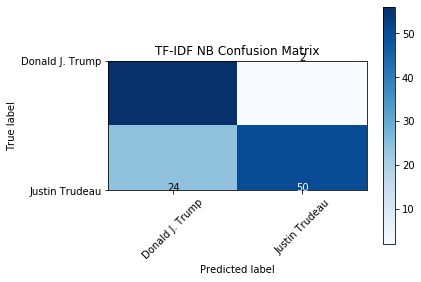

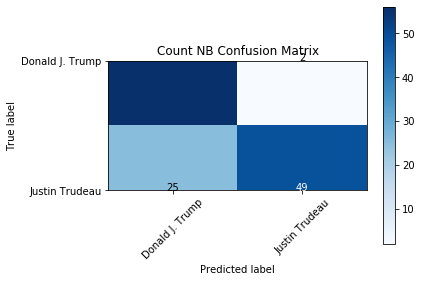

In [7]:
%matplotlib inline

from datasets.helper_functions import plot_confusion_matrix

# Calculate the confusion matrices for the tfidf_nb model and count_nb models
tfidf_nb_cm = metrics.confusion_matrix(y_test, tfidf_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])
count_nb_cm = metrics.confusion_matrix(y_test, count_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])

# Plot the tfidf_nb_cm confusion matrix
plot_confusion_matrix(tfidf_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF NB Confusion Matrix")

# Plot the count_nb_cm confusion matrix without overwriting the first plot 
plot_confusion_matrix(count_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="Count NB Confusion Matrix", figure=1)

# 6. Trying out another classifier: Linear SVC

So the Bayesian model only has one prediction difference between the TF-IDF and count vectorizers -- fairly impressive! Interestingly, there is some confusion when the predicted label is Trump but the actual tweeter is Trudeau. If we were going to use this model, we would want to investigate what tokens are causing the confusion in order to improve the model.

Now that we've seen what the Bayesian model can do, how about trying a different approach? LinearSVC is another popular choice for text classification. Let's see if using it with the TF-IDF vectors improves the accuracy of the classifier!

LinearSVC Score:   0.841
Confusion matrix, without normalization


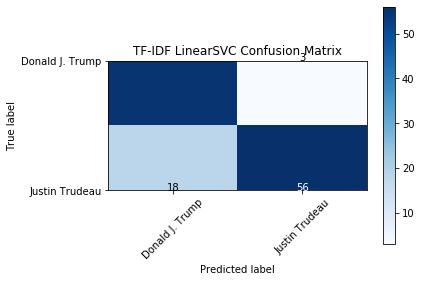

In [9]:
 #Create a LinearSVM model
tfidf_svc = LinearSVC()
tfidf_svc.fit(tfidf_train, y_train)

# Run predict on your tfidf test data to get your predictions
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)

# Calculate your accuracy using the metrics module
tfidf_svc_score = metrics.accuracy_score(tfidf_svc_pred, y_test)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Calculate the confusion matrices for the tfidf_svc model
svc_cm = metrics.confusion_matrix(y_test, tfidf_svc_pred, labels=['Donald J. Trump', 'Justin Trudeau'])

# Plot the confusion matrix using the plot_confusion_matrix function
plot_confusion_matrix(svc_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF LinearSVC Confusion Matrix")

# 7. Introspecting our top model

Wow, the LinearSVC model is even better than the Multinomial Bayesian one. Nice work! Via the confusion matrix we can see that, although there is still some confusion where Trudeau's tweets are classified as Trump's, the False Positive rate is better than the previous model. So, we have a performant model, right?

We might be able to continue tweaking and improving all of the previous models by learning more about parameter optimization or applying some better preprocessing of the tweets.

Now let's see what the model has learned. Using the LinearSVC Classifier with two classes (Trump and Trudeau) we can sort the features (tokens), by their weight and see the most important tokens for both Trump and Trudeau. What are the most Trump-like or Trudeau-like words? Did the model learn something useful to distinguish between these two men?

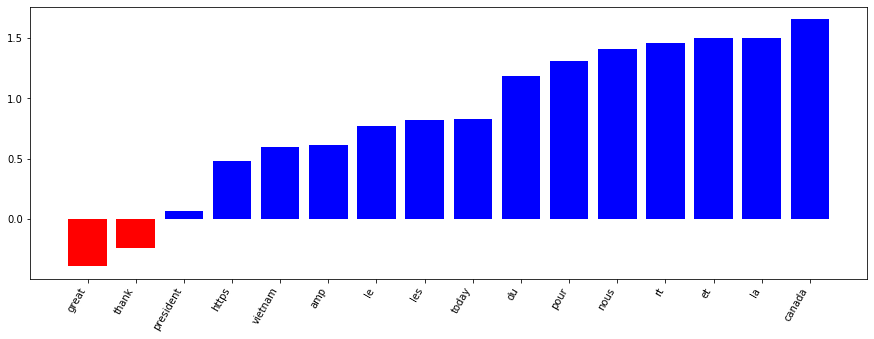

[(-0.3959878559856772, 'great'),
 (-0.24645474156447944, 'thank'),
 (0.06257031195081864, 'president'),
 (0.4821223172483609, 'https'),
 (0.5960503494117241, 'vietnam'),
 (0.6155592314736477, 'amp'),
 (0.7725825803781343, 'le'),
 (0.8213797796857398, 'les'),
 (0.8286617294919625, 'today'),
 (1.1869085392798018, 'du'),
 (1.3143507210757877, 'pour'),
 (1.412260762313314, 'nous'),
 (1.461266299648946, 'rt'),
 (1.4991808780826221, 'et'),
 (1.5056430761461757, 'la'),
 (1.6567961305299845, 'canada')]


In [10]:
from datasets.helper_functions import plot_and_return_top_features

# Import pprint from pprint
from pprint import pprint

# Get the top features using the plot_and_return_top_features function and your top model and tfidf vectorizer
top_features = plot_and_return_top_features(tfidf_svc, tfidf_vectorizer)

# pprint the top features
pprint(top_features)

# 8. Predict whether it's Trump or Trudeau tweeting?

In [11]:
# Write two tweets as strings, one which you want to classify as Trump and one as Trudeau
trump_tweet = 'From stronger action on climate change, to countering violent extremism, to peace & security in the Middle East – Canada and Jordan have many shared priorities. Thanks to @KingAbdullahII for the productive discussion today on addressing these issues together.'
trudeau_tweet = 'make america great'

# Vectorize each tweet using the TF-IDF vectorizer's transform method
trump_tweet_vectorized = tfidf_vectorizer.transform([trump_tweet])
trudeau_tweet_vectorized = tfidf_vectorizer.transform([trudeau_tweet])

# Call the predict method on your vectorized tweets
trump_tweet_pred = tfidf_svc.predict(trump_tweet_vectorized)
trudeau_tweet_pred = tfidf_svc.predict(trudeau_tweet_vectorized)

print("Predicted Trump tweet", trump_tweet_pred)
print("Predicted Trudeau tweet", trudeau_tweet_pred)

Predicted Trump tweet ['Justin Trudeau']
Predicted Trudeau tweet ['Donald J. Trump']


Our model is able to predict whether a tweet is being tweeted by Trump or Trudeau.